In [64]:
import pandas as pd



df=pd.read_csv("imdb_dataset.csv")
# veriden ilk 20 örneğin incelenmesi:
df.head(20)




,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Projemde gözetimli ve Gözetimsiz öğrenme tekniklerini kullandım.

Gözetimli öğrenme için Lojistik regresyon modeli kullanılarak (denetimli öğrenme), metin verilerinin hangi sentiment'e ait olduğunu tahmin eden bir model eğitiliyor.

Projemi kaggeldan imdb film verilerinin (50 bin film) bulundugu veri setini kullanarak yaptım.

Veri setim 10 bin veri noktasından fazla veri içeriyor ve verilerin boyutu 10mb'i geçiyor.

kaggle linki = https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data,


Başlangıçta veriden ilk bilgileri almak için pandas librariy'i import ederek ilk 20 veriyi inceliyorum.

Yukarda da göründüğü üzere iki farklı sütunumuz var. 
Bir tanesi film için yazılan eleştiriler bir diğeri ise yorumun olumlu ya da olumsuz olduğunu gösteren sütun.

Buradan sonra yorumlara karşılık gelen positive veya negative bir değer var mı diye veriyi görselleştirip bakacağız.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: xlabel='sentiment', ylabel='count'>

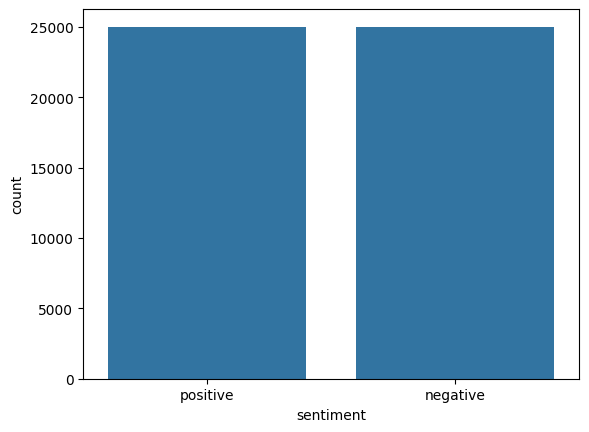

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

df.info()
# Pozitif/negatif yorum dağılımı:
sns.countplot(x="sentiment",data=df)

Yukarda da göründüğü üzere eldeki verilerin iki farklı değeri var olumlu ya da olumsuz.

Burdan sonra artık projeme başlıyorum çünkü null bir değer görünmüyor.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Sentiment Analysis supervised learning için
# TF-IDF ile metinleri vektörize etmek:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model oluşturup  eğitmek:
model = LogisticRegression(C=1)
model.fit(X_train_tfidf, y_train)

# Tahmin yapıp  doğruluğu ölçmek:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8942


Burada sklearn kütüphanemi kurarak label encoding oluşturdum ardından eğitim ve test setlerini ayırdım.

Sonrasında supervised learning için sentiment analysis yapıyoruz ve modelimizi oluşturup eğitiyoruz.

Ardından tahmin yapıp eğittiğimiz modelin doğruluğunu ölçüyoruz ve sonuç %89.42 çıkıyor.

In [68]:
from sklearn.cluster import KMeans
# Kmeans cluster unsupervised learning için:
# KMeans ile kümeler oluşturuyoruz:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_tfidf)

# Kümeleri görüntüle
print(kmeans.labels_[:100])

[1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1]


unsupervised learning için kmeans cluster yapacağız gereklilikleri import edip kmeans değişkeni oluşturuyoruz.

kmeans değişkenimizi fit edip sonuçlarımıza bakabiliriz.